In [30]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from collections import Counter
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold

In [24]:
final_df = pd.read_csv('final_Suleyman', index_col = 0) 

In [25]:
final_df

,ADMITTIME,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER,DOB,DOD,"Calcium, Total",...,Troponin I,Albumin,"Cholesterol, HDL","Cholesterol, Total",Troponin T,NTproBNP,Homocysteine,"Myoglobin, Urine",AGE,DIAGNOSIS
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
2,1537,9,2,21,0,1,1,1557,1557,3,...,0,0,1,1,7,0,0,0,43,1
3,265,3,2,20,0,1,1,534,534,4,...,0,1,1,1,4,0,0,0,35,1
5,1056,13,2,7,0,1,1,1545,1545,6,...,0,4,6,6,4,0,0,0,18,1
9,352,12,2,20,0,1,1,222,222,16,...,6,4,2,2,0,0,0,0,59,1
1,642,9,2,21,0,1,1,403,403,41,...,0,5,0,0,2,0,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,296,3,2,21,0,1,1,394,394,7,...,0,1,1,1,5,1,0,0,45,3
1763,1621,8,2,9,0,1,1,1789,1789,5,...,0,1,2,2,3,0,0,0,30,3
1865,1411,9,4,21,0,1,1,1624,1624,3,...,0,0,1,1,1,0,0,0,33,3


In [26]:
final_df = final_df.drop(['DOB', 'DOD','ADMITTIME'], axis = 1)

Class=1, n=597 (31.078%)
Class=2, n=1048 (54.555%)
Class=0, n=119 (6.195%)
Class=3, n=157 (8.173%)


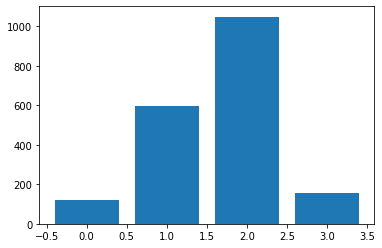

In [27]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=1048 (25.000%)
Class=2, n=1048 (25.000%)
Class=0, n=1048 (25.000%)
Class=3, n=1048 (25.000%)


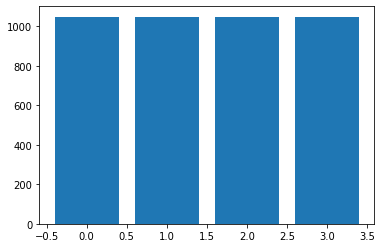

In [28]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [33]:
final_df = final_df.reset_index()

In [38]:
final_df.head(50)

,SUBJECT_ID,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER,"Calcium, Total",Creatinine,Glucose,...,Troponin I,Albumin,"Cholesterol, HDL","Cholesterol, Total",Troponin T,NTproBNP,Homocysteine,"Myoglobin, Urine",AGE,DIAGNOSIS
0,2,9,2,21,0,1,1,3,7,9,...,0,0,1,1,7,0,0,0,43,1
1,3,3,2,20,0,1,1,4,6,5,...,0,1,1,1,4,0,0,0,35,1
2,5,13,2,7,0,1,1,6,9,12,...,0,4,6,6,4,0,0,0,18,1
3,9,12,2,20,0,1,1,16,36,51,...,6,4,2,2,0,0,0,0,59,1
4,1,9,2,21,0,1,1,41,45,50,...,0,5,0,0,2,0,0,0,61,1
5,17,3,2,21,0,1,1,10,30,44,...,5,2,3,3,0,0,1,0,34,1
6,11,16,6,21,1,1,1,26,25,28,...,0,2,0,0,3,0,0,0,56,1
7,43,9,2,21,1,1,1,16,23,24,...,5,11,0,0,0,0,0,0,52,1
8,32,16,2,10,0,1,0,3,4,5,...,0,0,0,0,3,1,0,0,9,1
9,26,13,6,21,0,1,0,36,67,79,...,0,5,1,3,27,8,0,0,53,1


In [36]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [54]:
skf = StratifiedKFold(n_splits=2, shuffle = True, random_state = 3)
for train_index, test_index in skf.split(np.zeros(len(y)), y):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_X, test_X = X.loc[train_index], X.loc[test_index]
    train_y,test_y = y.loc[train_index],y.loc[test_index]

TRAIN: [   1    4    5    6    8   11   14   16   18   24   26   27   29   30
   32   42   43   47   48   49   50   51   55   60   61   64   68   74
   75   77   78   79   81   83   85   86   89   90   91   92   93   94
   95   96   97  101  102  103  104  105  108  109  110  113  115  120
  124  125  127  130  131  134  135  136  137  138  139  140  141  143
  144  146  147  148  150  152  153  156  158  160  161  163  164  165
  169  171  174  175  176  178  179  180  181  183  185  186  188  190
  191  192  193  195  197  198  199  203  208  211  217  218  220  222
  226  227  229  230  231  233  241  242  247  249  251  253  254  256
  258  260  261  263  264  265  268  269  270  272  273  274  277  278
  282  283  285  286  289  292  296  298  299  300  308  310  315  320
  322  323  325  331  332  334  335  338  341  343  346  348  351  353
  354  355  356  357  362  363  364  366  367  369  370  372  373  374
  375  378  379  382  383  384  385  388  390  391  392  400  401  403

In [46]:
# Modell SVM
clf = SVC(kernel='linear')

In [49]:
from yellowbrick.classifier import ClassificationReport

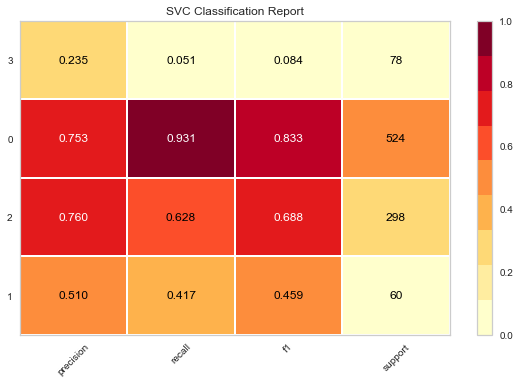

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [55]:
visualizer = ClassificationReport(clf, classes=y.unique(), support=True)
visualizer.fit(train_X, train_y)        # Fit the visualizer and the model
visualizer.score(test_X, test_y)        # Evaluate the model on the test data
visualizer.show()                       # Plot the result

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)

In [17]:
print(scores)

[0.68911917 0.734375   0.71354167 0.71875    0.69791667 0.73958333
 0.78125    0.77083333 0.79166667 0.74479167]


In [19]:
print(classification_report(y, y_pred, labels=[1, 2, 3]))

NameError: name 'y_pred' is not defined

In [1]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [6]:
final_df = pd.read_csv('final_Suleyman', index_col = 0) 

In [7]:
final_df

,ADMITTIME,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER,DOB,DOD,"Calcium, Total",...,Troponin I,Albumin,"Cholesterol, HDL","Cholesterol, Total",Troponin T,NTproBNP,Homocysteine,"Myoglobin, Urine",AGE,DIAGNOSIS
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
2,1537,9,2,21,0,1,1,1557,1557,3,...,0,0,1,1,7,0,0,0,43,1
3,265,3,2,20,0,1,1,534,534,4,...,0,1,1,1,4,0,0,0,35,1
5,1056,13,2,7,0,1,1,1545,1545,6,...,0,4,6,6,4,0,0,0,18,1
9,352,12,2,20,0,1,1,222,222,16,...,6,4,2,2,0,0,0,0,59,1
1,642,9,2,21,0,1,1,403,403,41,...,0,5,0,0,2,0,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,296,3,2,21,0,1,1,394,394,7,...,0,1,1,1,5,1,0,0,45,3
1763,1621,8,2,9,0,1,1,1789,1789,5,...,0,1,2,2,3,0,0,0,30,3
1865,1411,9,4,21,0,1,1,1624,1624,3,...,0,0,1,1,1,0,0,0,33,3


In [11]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

Class=1, n=597 (31.078%)
Class=2, n=1048 (54.555%)
Class=0, n=119 (6.195%)
Class=3, n=157 (8.173%)


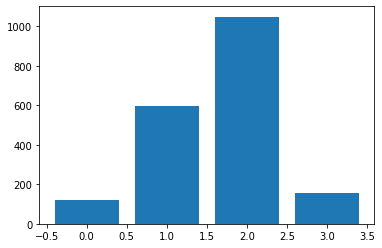

In [12]:
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=1048 (25.000%)
Class=2, n=1048 (25.000%)
Class=0, n=1048 (25.000%)
Class=3, n=1048 (25.000%)


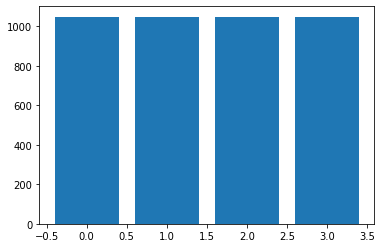

In [13]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test 
accuracy = svm_model_linear.score(X_test, y_test)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [16]:
accuracy

0.6722288438617402

In [17]:
cm

array([[134,  13,   6,  44],
       [ 37, 129,  29,  36],
       [  6,   9, 160,  26],
       [ 26,  23,  20, 141]], dtype=int64)

In [18]:
svm_model_rbf = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
svm_predictionsrbf = svm_model_rbf.predict(X_test)
 
# model accuracy for X_test 
accuracyrbf = svm_model_rbf.score(X_test, y_test)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictionsrbf)

In [19]:
accuracyrbf

0.27532777115613827

In [20]:
cm

array([[ 19,   0, 178,   0],
       [  0,   2, 229,   0],
       [  0,   0, 201,   0],
       [  0,   0, 201,   9]], dtype=int64)

In [21]:
svm_model_poly = SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
svm_predictionspoly = svm_model_poly.predict(X_test)
 
# model accuracy for X_test 
accuracypoly = svm_model_poly.score(X_test, y_test)
 
# creating a confusion matrix
cmpoly = confusion_matrix(y_test, svm_predictionspoly)

In [22]:
accuracypoly

0.3098927294398093

In [23]:
cmpoly

array([[ 62,   4, 131,   0],
       [ 30,  39, 162,   0],
       [ 29,  13, 159,   0],
       [ 60,  14, 136,   0]], dtype=int64)

In [24]:
X_train

,ADMITTIME,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER,DOB,DOD,"Calcium, Total",...,Hemoglobin,Troponin I,Albumin,"Cholesterol, HDL","Cholesterol, Total",Troponin T,NTproBNP,Homocysteine,"Myoglobin, Urine",AGE
1794,888,3,2,21,0,1,0,720,720,3,...,5,1,1,1,1,0,0,0,0,55
4,642,9,2,21,0,1,1,403,403,41,...,44,0,5,0,0,2,0,0,0,61
682,1840,13,2,20,0,1,1,1721,1721,5,...,13,1,0,0,0,0,0,0,0,49
1713,1409,9,2,21,0,1,1,1488,1488,11,...,16,0,3,0,0,10,0,0,0,40
1056,635,3,2,20,0,1,1,890,890,3,...,14,0,1,0,0,1,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1374,7,6,21,0,1,1,1155,1155,2,...,18,0,1,1,1,0,0,0,0,58
3264,1756,12,4,21,0,1,0,1532,1532,9,...,8,0,1,0,0,2,0,0,0,55
1653,559,16,2,21,1,1,1,476,476,4,...,7,1,0,1,1,0,0,0,0,53
2607,906,6,4,20,0,1,1,1219,1219,8,...,8,0,0,0,0,3,0,0,0,27


In [29]:
svm_model_sig = SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)
svm_predictionssig = svm_model_sig.predict(X_test)
 
# model accuracy for X_test 
accuracysig = svm_model_sig.score(X_test, y_test)
 
# creating a confusion matrix
cmsig = confusion_matrix(y_test, svm_predictionssig)

In [30]:
accuracysig

0.27771156138259834

In [31]:
cmsig

array([[ 12,  97,  80,   8],
       [ 11, 125,  91,   4],
       [ 10, 103,  84,   4],
       [  2,  82, 114,  12]], dtype=int64)